In [66]:
# here we will see to use cnn on our own dataset

from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from numpy import *
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import h5py

In [28]:
# now we ll give the path to the directory which is having directories again
# in the name of cat, dog, horse, human and inside files
# we have made inp_files another directory where all files are dumped together.

dirPath = os.path.abspath('cnn_dataset/inp_files')
files = os.listdir(dirPath)
resizedPath = os.path.abspath('cnn_dataset/inp_files_resized')
dataSize = files.__len__()
files.sort()
print(files)

['cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg', 'cat.107.jpg', 'cat.108.jpg', 'cat.109.jpg', 'cat.11.jpg', 'cat.110.jpg', 'cat.111.jpg', 'cat.112.jpg', 'cat.113.jpg', 'cat.114.jpg', 'cat.115.jpg', 'cat.116.jpg', 'cat.117.jpg', 'cat.118.jpg', 'cat.119.jpg', 'cat.12.jpg', 'cat.120.jpg', 'cat.121.jpg', 'cat.122.jpg', 'cat.123.jpg', 'cat.124.jpg', 'cat.125.jpg', 'cat.126.jpg', 'cat.127.jpg', 'cat.128.jpg', 'cat.129.jpg', 'cat.13.jpg', 'cat.130.jpg', 'cat.131.jpg', 'cat.132.jpg', 'cat.133.jpg', 'cat.134.jpg', 'cat.135.jpg', 'cat.136.jpg', 'cat.137.jpg', 'cat.138.jpg', 'cat.139.jpg', 'cat.14.jpg', 'cat.140.jpg', 'cat.141.jpg', 'cat.142.jpg', 'cat.143.jpg', 'cat.144.jpg', 'cat.145.jpg', 'cat.146.jpg', 'cat.147.jpg', 'cat.148.jpg', 'cat.149.jpg', 'cat.15.jpg', 'cat.150.jpg', 'cat.151.jpg', 'cat.152.jpg', 'cat.153.jpg', 'cat.154.jpg', 'cat.155.jpg', 'cat.156.jpg', 'cat.157.jpg', 'cat.158.jpg', 'cat.159.jpg', 'c

In [29]:
# now we ll pick each mage and resize it
# we resize image to (128, 128)

imgSize = (200, 200)

for file in files:
    img = Image.open(dirPath + '/' + file)
    #new = img.resize(imgRows, imgColumns)
    new = img.resize(imgSize)
    
    # if we wish we can convert it into grayscale
    
    #gray = new.convert('L')
    new.save(resizedPath +  '/' +file)
    

In [30]:
# now we load resized file and check the shape

images = []
for file in files:
    img2 = Image.open(resizedPath + '/' + file)
    array = np.array(img2, dtype = 'float32') / 255 #normalizing to get 0 to 1
    images.append(array)

In [31]:
images = np.array(images)
images.shape

(808, 200, 200, 3)

In [43]:
# we are having 808 files of 200*200 and 3 channel
# so we will flatten the files and put in array
# we will get shape as (808, 128*128)

#flatImg = []
#for image in images:
    #preImgMatrix = image.flatten()

    # here all the 3 channels are also included in flattening, 
    # so we use reshape to obtain back the channels
    #but cnn takes dimensional input, we dont need to flatten

    #imgMatrix = preImgMatrix.reshape(40000, 3)
    
    # now we will keep appending them into list 
    
    #flatImg.append(imgMatrix)
# now we will convert the obtained flat matrix with channel to numpy 

#flatImg = np.array(flatImg)
#flatImg.shape

(808, 40000, 3)

In [44]:
# now we will do labelling of data, 
# we have 202 cat images, 202 dog images, 202 horse images, 202 rider images
labels = np.zeros(dataSize, dtype = int)

# cat label 0

# dog label 1
labels[202:404] = 1

#horse label = 2
labels[404:606] = 2

#rider label = 3
labels[606:808] = 3

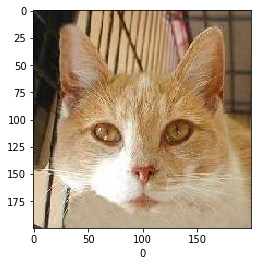

In [54]:
# now if we want to visualize the data we can reshape and see

plotId = 115
plotImg = images[plotId]
plt.imshow(plotImg)
plt.xlabel(labels[plotId])
plt.show()

In [59]:
# now we will shuffle the data. 
# shuffle keeps all the parameters given to it together and shuffle them
data, labelShuffle = shuffle(images, labels, random_state = 2)
#here random_state is used as random seed to give exact same random output

# now we ll combine to make train data
#trainData = [data, labelShuffle]

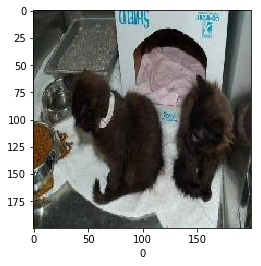

In [60]:
plotId = 115
plotImg = data[plotId]
plt.imshow(plotImg)
plt.xlabel(labelShuffle[plotId])
plt.show()

In [83]:
# now we will set the hyper parameters of the our model

batchSize = 32
epochs = 20
classes = 4

# 200 * 200
imgRows = 200
imgCols = 200

filterNo = 32
filterSize = (3, 3)

poolSize = (2, 2)
# it will pull out from window of 2*2, ie, 1 value from 4 squares

In [70]:
# we will split the data into train test

xTrain, xTest, yTrain, yTest = train_test_split(data, labelShuffle, test_size = 0.2, random_state = 2)
xTrain.shape

(646, 200, 200, 3)

In [71]:
# now we ll make the ytrain to one hot vector classes with nb_utils

yTrain = np_utils.to_categorical(yTrain, classes)
yTest = np_utils.to_categorical(yTest, classes)

In [78]:
yTrain[36]

array([ 0.,  1.,  0.,  0.])

In [85]:
#now we will build the model
# the parameters and way keep on changing, as for now these are the conventions, check with keras
#input shape = (200, 200, 3) channel depth at last
model = Sequential()
model.add(Convolution2D(filters = filterNo, kernel_size = filterSize,
                        input_shape = (imgRows, imgCols, 3), 
                        padding = 'valid'))

convout1 = Activation('relu')
model.add(convout1)

# we only have to specify input_shape n padding in the first layer only
model.add(Convolution2D(filters = filterNo, kernel_size = filterSize))
convout2 = Activation('relu')
model.add(convout2)

model.add(MaxPooling2D(pool_size = poolSize))

#after this we will add dropout with probability 0.25
model.add(Dropout(0.25))

#now we have completed the 2 layer convolutional model, now we ll 
# expand the 2D image into 1D vector so that fully connected layer can b applied

model.add(Flatten())

# now we ll connect a FC layer with 128 neuron units
model.add(Dense(128))
model.add(Activation('relu'))
# now our Fc layer is converted and giving  out output from 
#128 unit, next we ll have to add layers with 4 units 
# which would give us probability of class

model.add(Dropout(0.5))
model.add(Dense(classes))
model.add(Activation('softmax'))

In [86]:
# now we ll compile
# we will use categorical loss because we are categorizing into classes
# here only we need to give in metrics what we wanna judge the model on
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [87]:
# now we can give the model the data
# here we don't have to give the input shape, because we have to give input shape
# to the first layer of our model, which we already have done.
# we need t give batch_size if we want batch processing
# initial_epoch parameter is also there to give from which epoch to start,
# useful for resuming training
model.fit(xTrain, yTrain, batch_size = batchSize, epochs = epochs, verbose = 1,
          validation_data = (xTest, yTest), initial_epoch = 0)

Train on 646 samples, validate on 162 samples
Epoch 1/20
646/646 [==============================] - 110s - loss: 6.4948 - acc: 0.3034 - val_loss: 1.4201 - val_acc: 0.3704
Epoch 2/20
646/646 [==============================] - 110s - loss: 1.0711 - acc: 0.5526 - val_loss: 0.9807 - val_acc: 0.5309
Epoch 3/20
646/646 [==============================] - 110s - loss: 0.6867 - acc: 0.7430 - val_loss: 0.9842 - val_acc: 0.5864
Epoch 4/20
646/646 [==============================] - 106s - loss: 0.4261 - acc: 0.8808 - val_loss: 1.3967 - val_acc: 0.5062
Epoch 5/20
646/646 [==============================] - 109s - loss: 0.2505 - acc: 0.9350 - val_loss: 1.3619 - val_acc: 0.5802
Epoch 6/20
646/646 [==============================] - 107s - loss: 0.1883 - acc: 0.9489 - val_loss: 1.3715 - val_acc: 0.5864
Epoch 7/20
646/646 [==============================] - 107s - loss: 0.1081 - acc: 0.9814 - val_loss: 1.4162 - val_acc: 0.5864
Epoch 8/20
646/646 [==============================] - 107s - loss: 0.1564 - acc

In [90]:
model.save(dirPath + '/model_save_owndataset.h5')

In [93]:
evaluate model.evaluate(xTest, yTest, verbose = 0)

[1.6846535235275457, 0.59259259259259256]

In [95]:
predict = model.predict_classes(xTest[:5])

5/5 [==============================] - 0s


In [96]:
predict

array([2, 2, 1, 0, 1])

In [98]:
yTest[:5]

array([[ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.]])